In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('./src')

import os
import cv2
import numpy as np
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt

import configs as cfgs
from model import Model
from callbacks import LearningRateScheduler
from data_loader import data_loader, view_data

In [3]:
data = data_loader()

In [4]:
model = Model()

In [5]:
lr_scheduler = LearningRateScheduler()
tensorboard  = tf.keras.callbacks.TensorBoard(write_graph=False, update_freq=1)

In [ ]:
model.fit_generator(
    data,
    steps_per_epoch = cfgs.MAX_ITERATION//cfgs.MAX_EPOCH,
    epochs = cfgs.MAX_EPOCH,
    callbacks = [lr_scheduler, tensorboard]
)

In [6]:
#model.save_weights('cell_detector_weights.h5')

In [7]:
for sample in data.take(11):
    img = np.uint8(sample[0][0]*cfgs.PIXEL_STD+cfgs.PIXEL_MEAN)
    true_classes = sample[1]['classification'][0]
    true_regress = sample[1]['regression'][0]

In [10]:
classes, regress = model.predict(sample[0])
pred_classes = classes[0] #np.where(classes[0]>0.3, 1, 0)
pred_regress = regress[0]

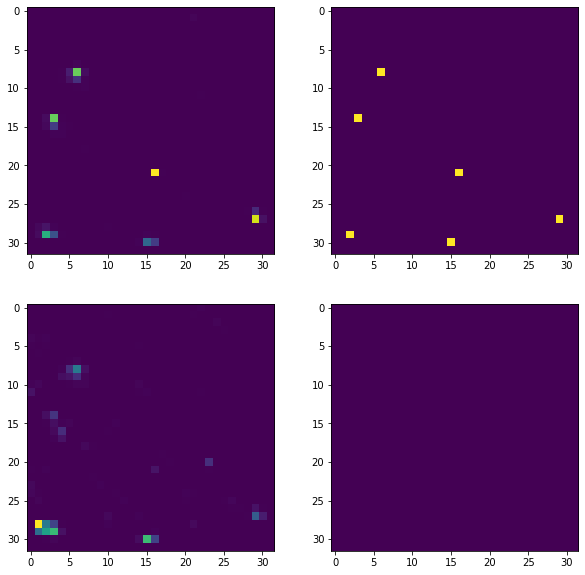

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(pred_classes[...,0])

plt.subplot(222)
plt.imshow(true_classes[...,0])

plt.subplot(223)
plt.imshow(pred_classes[...,1])

plt.subplot(224)
plt.imshow(true_classes[...,1])

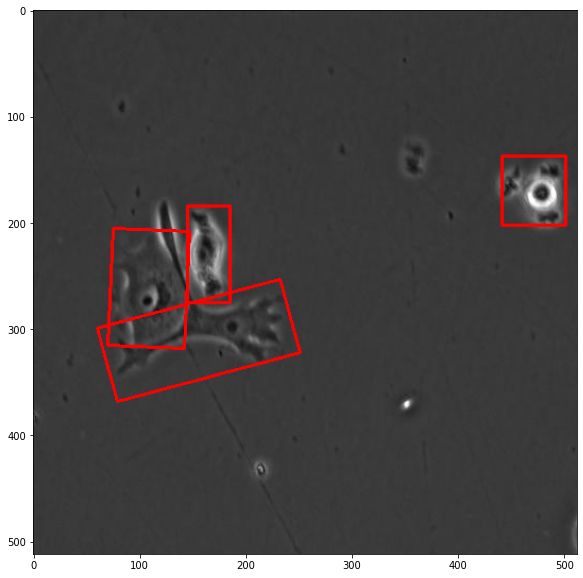

In [11]:
view_data(img, true_classes.numpy(), true_regress.numpy())

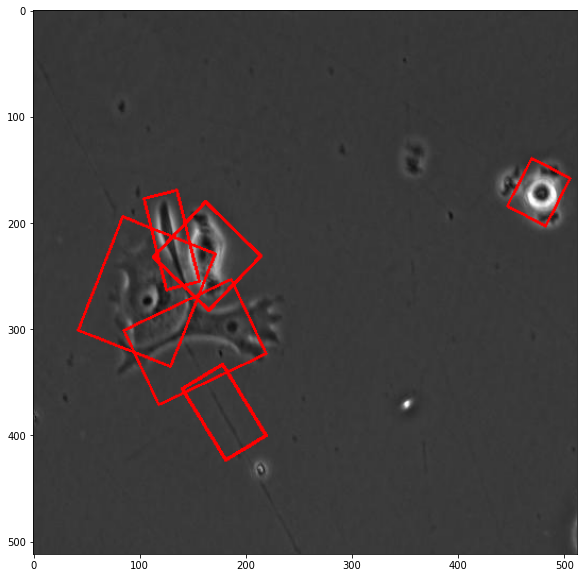

In [12]:
view_data(img, pred_classes, pred_regress)

In [13]:
from glob import glob

test_imgs = glob('/workdir/datasets/msc/UFRGS_CELL_2classes/test/imgs/*.jpg')

In [14]:
def resize2ratio(img):
    h,w,c = img.shape
    hh = h%2**5; ww = w%2**5
    
    img = cv2.copyMakeBorder(img, 0, hh, 0, ww, cv2.BORDER_CONSTANT)
    
    return img

In [15]:
path_img = np.random.choice(test_imgs)
img = cv2.imread(path_img)
img = resize2ratio(img)

In [16]:
img_batch = np.float32((img-cfgs.PIXEL_MEAN)/cfgs.PIXEL_STD)[np.newaxis,...]

classes, regress = model.predict(img_batch)
pred_classes = np.where(classes[0]>0.3, 1, 0)
pred_regress = regress[0]

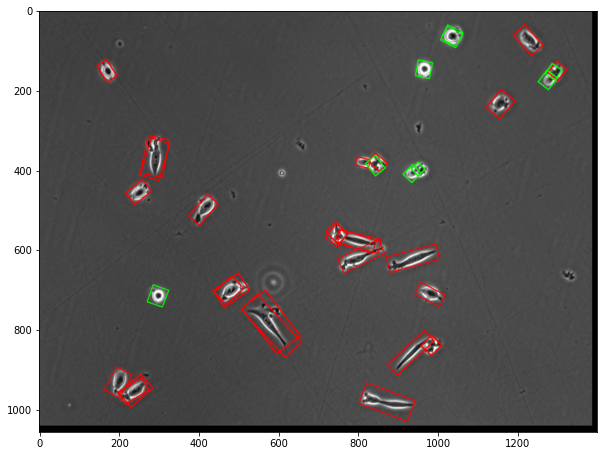

In [17]:
view_data(img, pred_classes, pred_regress)

In [8]:
!python test_ufrgscell.py --img_dir='/workdir/datasets/msc/UFRGS_CELL_2classes/test/imgs'  \
                          --gpu=0 \
                          --image_ext='.jpg' \
                          --test_annotation_path='/workdir/datasets/msc/UFRGS_CELL_2classes/test/xml_rotdet' \
                          --model_weights_path='./cell_detector_weights.h5'

Eval image exp_M3_Mauricio_mcf7_frame_17: 100%|█| 30/30 [00:10<00:00,  2.78it/s]
********************
rotation eval:
Writing normal_cell VOC resutls file
Writing mitoses VOC resutls file
Threshold:  0.5
cls : normal_cell|| Recall: 0.7147688830724139 || Precison: 0.5747960108794198|| AP: 0.594013095265994
F1:0.6783641956783185 P:0.6814562002275313 R:0.6753100330605298
cls : mitoses|| Recall: 0.5047618999546486 || Precison: 0.5463917525773195|| AP: 0.4505165043675955
F1:0.552481313189693 P:0.6578947368421053 R:0.47619047165532885
mAP is : 0.5222647998167947


Threshold:  0.55
cls : normal_cell|| Recall: 0.6448703487656479 || Precison: 0.5185856754306437|| AP: 0.4965127445760128
F1:0.6139011614068921 P:0.6156462585034014 R:0.6121758730415153
cls : mitoses|| Recall: 0.4476190433560091 || Precison: 0.4845360824742268|| AP: 0.34801750439899104
F1:0.4864815752138885 P:0.5625 R:0.42857142448979596
mAP is : 0.4222651244875019


Threshold:  0.6000000000000001
cls : normal_cell|| Recall: 0.555806